In [40]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv2D, MaxPooling2D, TimeDistributed, Conv1D, Reshape, ConvLSTM2D, Conv3D, MaxPooling3D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import plot_model
from keras import regularizers

import tensorflow as tf

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import AveragePooling2D
from keras.applications import ResNet50
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os



In [41]:
print("[INFO] loading images...")

# imagePaths = list(paths.list_images(args["dataset"]))
imagePaths = ["Capture", "Pointing", "ZoomIn", "ZoomOut"]
data = []
labels = []
path = "FinalDataset"

# loop over the image paths
for imagePath in imagePaths:

	folders = [i for i in os.listdir(path + "/" + imagePath)]
	for folder in folders:
		photos = [i for i in os.listdir(path + "/" + imagePath + "/" + folder)]
		arr = np.zeros((100,100))
		for photo in photos:
			# load the image
			image = cv2.imread(path + "/" + imagePath + "/" + folder + "/" + photo)
		
			# update the data and labels lists, respectively
			# arr.append(image[:,:,0])
			# arr.append(image)
			arr = np.concatenate((arr, image[:,:,0]), axis=1)
		# print(arr[:,100:].shape)
		data.append(arr[:,100:])
		labels.append(imagePath)


# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# lb.get_params(labels)
print(data.shape)
print(labels.shape)

[INFO] loading images...
(1716, 100, 1500)
(1716, 4)


In [42]:
print(lb.classes_)
print(lb.transform(lb.classes_))

['Capture' 'Pointing' 'ZoomIn' 'ZoomOut']
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [43]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.3, stratify=labels, random_state=42)
print(trainX.shape, trainY.shape)

(1201, 100, 1500) (1201, 4)


In [44]:
trainX = trainX.reshape([len(trainX),1, 100, 1500])
testX = testX.reshape([len(testX),1,100, 1500])
# print(trainX.shape, trainY.shape)
# print(trainX[0][0])
# print(trainX[0][0].shape)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 32, 97, 1497)      544       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 10, 32, 1497)      0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 8, 30, 32)         431168    
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 6, 28, 32)         9248      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 3, 14, 32)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 1, 12, 32)         9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 384)             

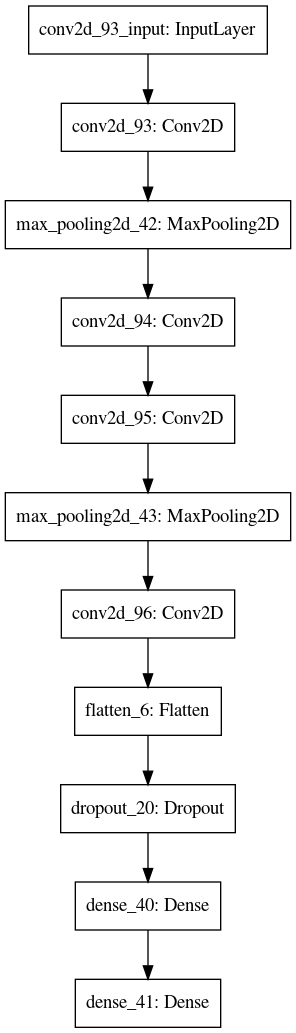

In [51]:
model = Sequential()
# model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
#                    input_shape=(1, 100, 1500),
#                    padding='same', return_sequences=True))
model.add(Conv2D(32,kernel_size=(4,4), padding="valid", activation="relu", data_format="channels_first", input_shape = (1,100,1500)))
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(Conv2D(32,kernel_size = (3,3), padding="valid", activation="relu",kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32,kernel_size = (3,3), padding="valid", activation="relu",kernel_regularizer = regularizers.l2(0.01)))
model.add(Flatten())
# model.add(Reshape((12, 32)))
# model.add(LSTM(100))

model.add(Dropout(0.5))
# model.add(Conv1D(1,kernel_size=10,padding="same",activation='relu'))
# model.add(LSTM(100))
# model.add(LSTM(50))
# model.add(LSTM(10, activation='tanh', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(20, kernel_regularizer = regularizers.l2(0.1)))

model.add(Dense(units = 4, activation = 'softmax'))

model.build((100,1500, 1))
model.summary()
plot_model(model, to_file='model1.png')


In [16]:
# res_conv = ResNet50(include_top=False,
#                     weights='imagenet',
#                     input_tensor=None,
#                     input_shape=(1,100,1500),
#                     pooling=None,classes=1000,
#                     data_format="channels_first")
model = Sequential()
# model.add(res_conv)

model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(1,100,1500), activation='relu',data_format="channels_first"))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


model.summary()
# plot_model(model, to_file='model.png')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 100, 1500)     320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 100, 32)       432032    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 50, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 50, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 25, 64)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 25, 128)       

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=10, shuffle=True)


Train on 1201 samples, validate on 515 samples
Epoch 1/5
1201/1201 [==============================] - 123s 103ms/step - loss: 2.6085 - accuracy: 0.7290 - val_loss: 1.4124 - val_accuracy: 0.7500
Epoch 2/5
1201/1201 [==============================] - 120s 100ms/step - loss: 1.0256 - accuracy: 0.7483 - val_loss: 0.7808 - val_accuracy: 0.7500
Epoch 3/5
1201/1201 [==============================] - 113s 94ms/step - loss: 0.7056 - accuracy: 0.7500 - val_loss: 0.6495 - val_accuracy: 0.7500
Epoch 4/5
1201/1201 [==============================] - 106s 88ms/step - loss: 0.6323 - accuracy: 0.7500 - val_loss: 0.6195 - val_accuracy: 0.7500
Epoch 5/5
1201/1201 [==============================] - 105s 87ms/step - loss: 0.6096 - accuracy: 0.7500 - val_loss: 0.6092 - val_accuracy: 0.7500


In [47]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.00%


In [48]:
# save model and architecture to single file
model.save("model_LSTM2D.h5")
print("Saved model to disk")

Saved model to disk
